# Taller Evaluado 2

En base a los arhivos "Base_Lineal_2019.xlsx", "Base_Lineal_2020.xlsx" y "Base_Lineal_2021.xlsx", los cuales contienen información sobre los permisos de edificación de los años 2019, 2020 y 2021, deben contestas las siguientes preguntas mediante el análisis de los datos y representación gráfica:

Se deben considerar ambos años para todas las respuestas.

Apoyarse en:

[Ejemplo de gráficos Matplotlib](https://matplotlib.org/stable/gallery/index)

[Ejemplo de gráficos Seaborn](https://seaborn.pydata.org/examples/index.html)

Todas las consultas realizadas a ChatGPT o similar, deben ser revidamente documentadas.

In [1]:
import pandas as pd


# Leemos la segunda página de los archivos excel

df_2019 = pd.read_excel('Base_Lineal_2019.xlsx', sheet_name=1)
df_2020 = pd.read_excel('Base_Lineal_2020.xlsx', sheet_name=1)
df_2021 = pd.read_excel('Base_Lineal_2021.xlsx', sheet_name=1)

display(df_2019)

,Año,Mes,Region,Provincia,Cod_comuna,Comuna,folio,dv_folio,Cod_sector,Glosa_sector,...,cod_material2_grupo7,material2_grupo7,cod_material3_grupo7,material3_grupo7,cod_material1_grupo8,material1_grupo8,cod_material2_grupo8,material2_grupo8,cod_material3_grupo8,material3_grupo8
0,2019,1,1,11,1101,Iquique,818,6,2,PRIVADO,...,7.0,GRIFERIA ESTANDAR,9.0,MOBILIARIO COCINA ESTANDAR,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,1,11,1101,Iquique,819,8,2,PRIVADO,...,5.0,VANITORIO CUBIERTA RESINA,7.0,GRIFERIA ESTANDAR,4.0,AIRE ACONDICIONADO INYEC.- EXTRACCION,5.0,SISTEMA ALARMA,6.0,CIRCUITO CERRADO TV
2,2019,1,1,11,1101,Iquique,864,4,2,PRIVADO,...,7.0,GRIFERIA ESTANDAR,NaN,NaN,5.0,SISTEMA ALARMA,NaN,NaN,NaN,NaN
3,2019,1,1,11,1101,Iquique,865,6,2,PRIVADO,...,7.0,GRIFERIA ESTANDAR,9.0,MOBILIARIO COCINA ESTANDAR,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,11,1101,Iquique,866,8,2,PRIVADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58934,2019,12,16,163,16304,San Fabián,16304121,5,2,PRIVADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58935,2019,12,16,163,16304,San Fabián,16304122,7,2,PRIVADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58936,2019,12,16,163,16305,San Nicolás,1630555,8,2,PRIVADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58937,2019,12,16,163,16305,San Nicolás,16305156,2,1,PUBLICO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pregunta 1: Para los tres años ¿Existe relación entre la cantidad de permisos de edificación y la cantidad de habitantes por región?

Utilización datos de cantidad de habitantes por región según:
[Cantidad de habitantes por región](https://es.wikipedia.org/wiki/Anexo:Regiones_de_Chile_por_poblaci%C3%B3n)

Además de considerar que, en los excel, la numeración de las regiones es:

 1 = Región de Tarapacá

 2 = Región de Antofagasta

 3 = Región de Atacama

 4 = Región de Coquimbo

 5 = Región de Valparaíso

 6 = Región del Libertador General Bernardo O’Higgins

 7 = Región del Maule

 8 = Región del Biobío

 9 = Región de La Araucanía

 10 = Región de Los Lagos

 11 = Región Aysén del General Carlos Ibáñez del Campo

 12 = Región de Magallanes y Antártica Chilena

 13 = Región Metropolitana de Santiago

 14 = Región de Los Ríos

 15 = Región de Arica y Parinacota

 16 = Región de Ñuble

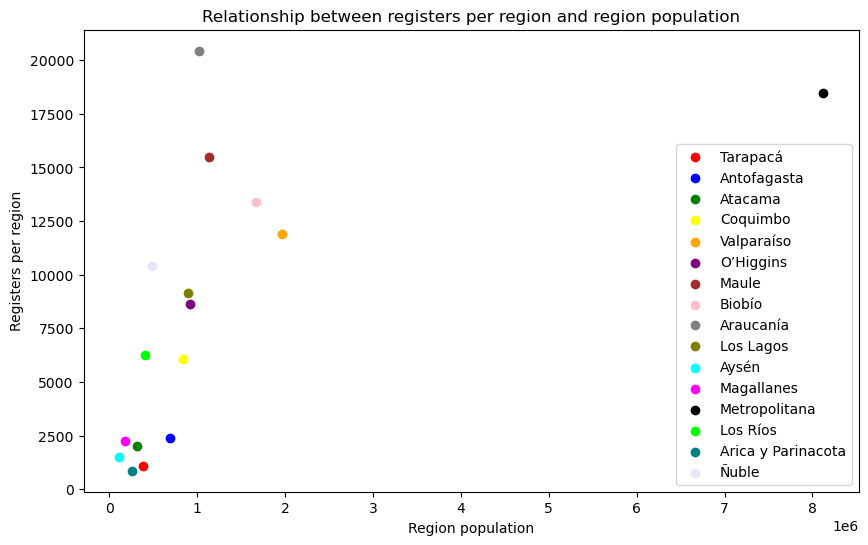

In [16]:
import matplotlib.pyplot as plt

# create a dictionary with the population of each region
region_population = {
    'Tarapacá': 382773,
    'Antofagasta': 691854,
    'Atacama': 314709,
    'Coquimbo': 836096,
    'Valparaíso': 1960170,
    'O’Higgins': 914555,
    'Maule': 1131939,
    'Biobío': 1663696,
    'Araucanía': 1014343,
    'Los Lagos': 891440,
    'Aysén': 107297,
    'Magallanes': 178362,
    'Metropolitana': 8125072,
    'Los Ríos': 405835,
    'Arica y Parinacota': 252110,
    'Ñuble': 480609
}

# create a list with the number of registers per region
registers_per_region = [len(df_2019[df_2019['Region'] == i]) + len(df_2020[df_2020['Region'] == i]) + len(df_2021[df_2021['Region'] == i]) for i in range(1, 17)]

# create a list with the name of each region
region_names = ['Tarapacá', 'Antofagasta', 'Atacama', 'Coquimbo', 'Valparaíso', 'O’Higgins', 'Maule', 'Biobío', 'Araucanía', 'Los Lagos', 'Aysén', 'Magallanes', 'Metropolitana', 'Los Ríos', 'Arica y Parinacota', 'Ñuble']


# create a list with the color of each region
region_colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'black', 'lime', 'teal', 'lavender']

# create a figure
plt.figure(figsize=(10, 6))

# create a scatter plot
for i in range(16):
    plt.scatter(region_population[region_names[i]], registers_per_region[i], color=region_colors[i])
    
# set the title and labels
plt.title('Relationship between registers per region and region population')
plt.xlabel('Region population')
plt.ylabel('Registers per region')

# Legend of the colors and regions
plt.legend(region_names)



# show the plot
plt.show()


## Pregunta 2: ¿Existen meses con mayor demanda de permisos de edificación? realizar el análisis para los tres años.

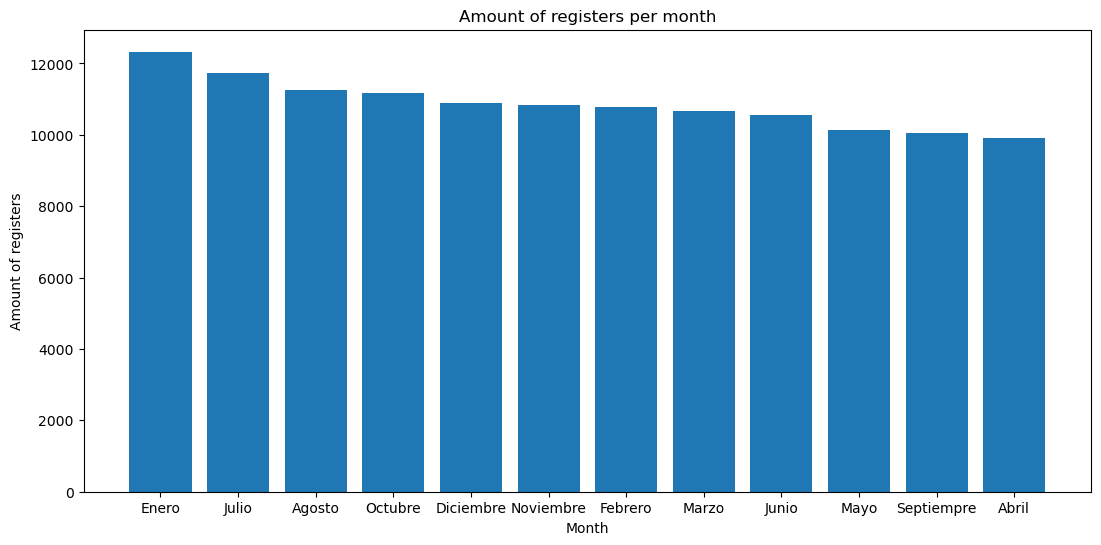

In [3]:
import matplotlib.pyplot as plt

# create a plot of the amount of registers per "Mes" 

# create a list with the name of each month
month_names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiempre', 'Octubre', 'Noviembre', 'Diciembre']

# create a list with the amount of registers per month
registers_per_month = [len(df_2019[df_2019['Mes'] == i]) + len(df_2020[df_2020['Mes'] == i]) + len(df_2021[df_2021['Mes'] == i]) for i in range(1, 13)]

# sort the data in descending order
month_names, registers_per_month = zip(*sorted(zip(month_names, registers_per_month), key=lambda x: x[1], reverse=True))

# create a figure
plt.figure(figsize=(13, 6))

# create a bar plot
plt.bar(month_names, registers_per_month)

# set the title and labels
plt.title('Amount of registers per month')
plt.xlabel('Month')
plt.ylabel('Amount of registers')

# show the plot
plt.show()






## Pregunta 3: ¿Cual es la relación entre que la cantidad de permisos de edificación en función del área (Urbana o Rural) y el tipo de permiso (columna tipo_permiso)?

tipo_permiso,AMPLIACIÓN,OBRA NUEVA,REGULARIZACIÓN AMPLIACIÓN,REGULARIZACIÓN OBRA NUEVA
cod_area,,,,
1,23462,24544,29376,16817
2,5635,20916,3085,6497


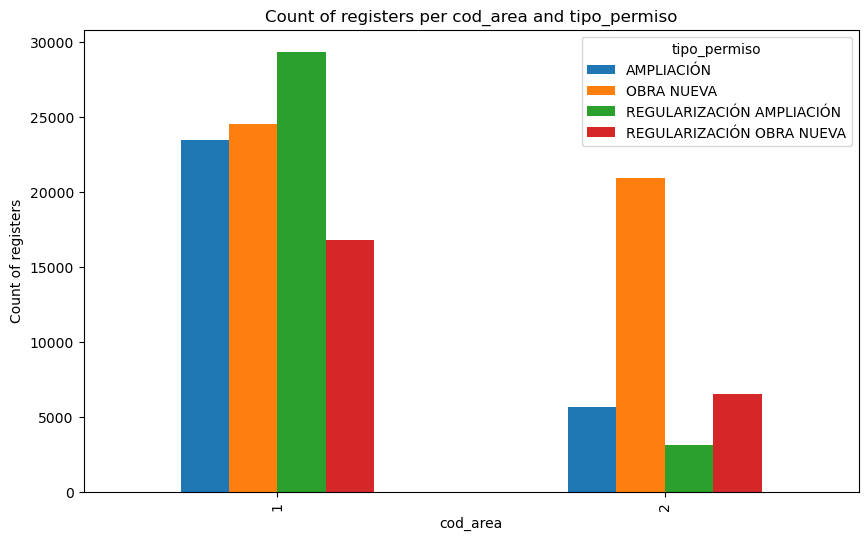

In [9]:
import pandas as pd

# Creamos un dataframe con toda la informacion
df = pd.concat([df_2019, df_2020, df_2021])

# Creamos una tabla pivot con la cuenta de registros por codigo de area y tipo de permiso
pivot_table = pd.pivot_table(df, values='Region', index=['cod_area'], columns=['tipo_permiso'], aggfunc=len, fill_value=0)

# Mostramos la tabla con los valores
display(pivot_table)

# Barplot de la tabla pivot
pivot_table.plot(kind='bar', figsize=(10,6))
plt.title('Count of registers per cod_area and tipo_permiso')
plt.xlabel('cod_area')
plt.ylabel('Count of registers')
plt.show()


## Pregunta 4: ¿Podemos afirmar que los permisos de edificación en zonas rurales están relacionados con instalaciones (Agua, alcantarillado y electricidad) del tipo "Sistema individual" y "sistema privado colectivo"?


In [26]:
import pandas as pd

# Creamos un dataframe con toda la informacion
df = pd.concat([df_2019, df_2020, df_2021])

# Cortar la tabla a solamente los que tienen cod_area = 2

df = df[df['cod_area'] == 2]

# Seleccionar solo las columnas "agua_p", "alcantarillado" y "electricidad" 

df = df[["Region", 'agua_p', 'alcantarillado', 'electricidad']]
display(df)

# Crear una tabla con las columnas "agua_p", "alcantarillado" y "electricidad" y la cuenta de cada valor

pivot_table = pd.pivot_table(df, values='Region', index=['alcantarillado'], columns=['electricidad', "agua_p"], aggfunc=len, fill_value=0)

display(pivot_table)

# Cortar las columnas para solo utilizar "SIST.PRIVADO COLECTIVO" y "Sistema Individual"





,Region,agua_p,alcantarillado,electricidad
26,1,RED PUBLICA,RED PUBLICA,RED PUBLICA
27,1,SISTEMA INDIVIDUAL,SISTEMA INDIVIDUAL,GENERADOR
30,1,SISTEMA INDIVIDUAL,SISTEMA INDIVIDUAL,RED PUBLICA
46,2,SISTEMA INDIVIDUAL,SISTEMA INDIVIDUAL,RED SUBTERRANEA
47,2,SISTEMA INDIVIDUAL,SISTEMA INDIVIDUAL,RED SUBTERRANEA
...,...,...,...,...
36435,16,SISTEMA INDIVIDUAL,SISTEMA INDIVIDUAL,RED PUBLICA
36436,16,SISTEMA INDIVIDUAL,SISTEMA INDIVIDUAL,RED PUBLICA
36437,16,RED PUBLICA,SISTEMA INDIVIDUAL,RED PUBLICA
36438,16,RED PUBLICA,SIST.PRIVADO COLECTIVO,RED PUBLICA


electricidad             GENERADOR                                            \
agua_p                 RED PUBLICA SIST.PRIVADO COLECTIVO SISTEMA INDIVIDUAL   
alcantarillado                                                                 
RED PUBLICA                     68                      1                  1   
SIST.PRIVADO COLECTIVO           4                     38                  2   
SISTEMA INDIVIDUAL              63                     54                923   

electricidad              NO TIENE                                            \
agua_p                 RED PUBLICA SIST.PRIVADO COLECTIVO SISTEMA INDIVIDUAL   
alcantarillado                                                                 
RED PUBLICA                     38                      1                  0   
SIST.PRIVADO COLECTIVO           3                     13                  0   
SISTEMA INDIVIDUAL              65                     48                540   

electricidad           RED PUBLICA                                            \
agua_p                 RED PUBLICA SIST.PRIVADO COLECTIVO SISTEMA INDIVIDUAL   
alcantarillado                                                                 
RED PUBLICA                   6263                     87                 96   
SIST.PRIVADO COLECTIVO         479                   1091                 42   
SISTEMA INDIVIDUAL            7036                   4815              12678   

electricidad           RED SUBTERRANEA                         \
agua_p                     RED PUBLICA SIST.PRIVADO COLECTIVO   
alcantarillado                                                  
RED PUBLICA                        168                      3   
SIST.PRIVADO COLECTIVO              20                    161   
SISTEMA INDIVIDUAL                 152                    671   

electricidad                               
agua_p                 SISTEMA INDIVIDUAL  
alcantarillado                             
RED PUBLICA                             2  
SIST.PRIVADO COLECTIVO                  3  
SISTEMA INDIVIDUAL                    504

## Pregunta 5: Para cada uno de los tres años ¿Cuales son las 10 comunas que tienen una mayor cantidad de permisos de edificación con num_pisos mayores a 5?

Cod_comuna
13101    58
13120    42
13123    34
13109    30
8101     28
13110    24
13132    20
13114    17
13118    17
9101     17
Name: Region, dtype: int64

Cod_comuna
13101    43
13120    39
13114    25
13110    19
8101     17
13123    17
13118    10
13102     9
13132     9
5109      9
Name: Region, dtype: int64

Cod_comuna
13101    41
13110    34
13120    31
13123    27
13114    21
8101     18
2101     16
1101     13
5109     11
13106    10
Name: Region, dtype: int64

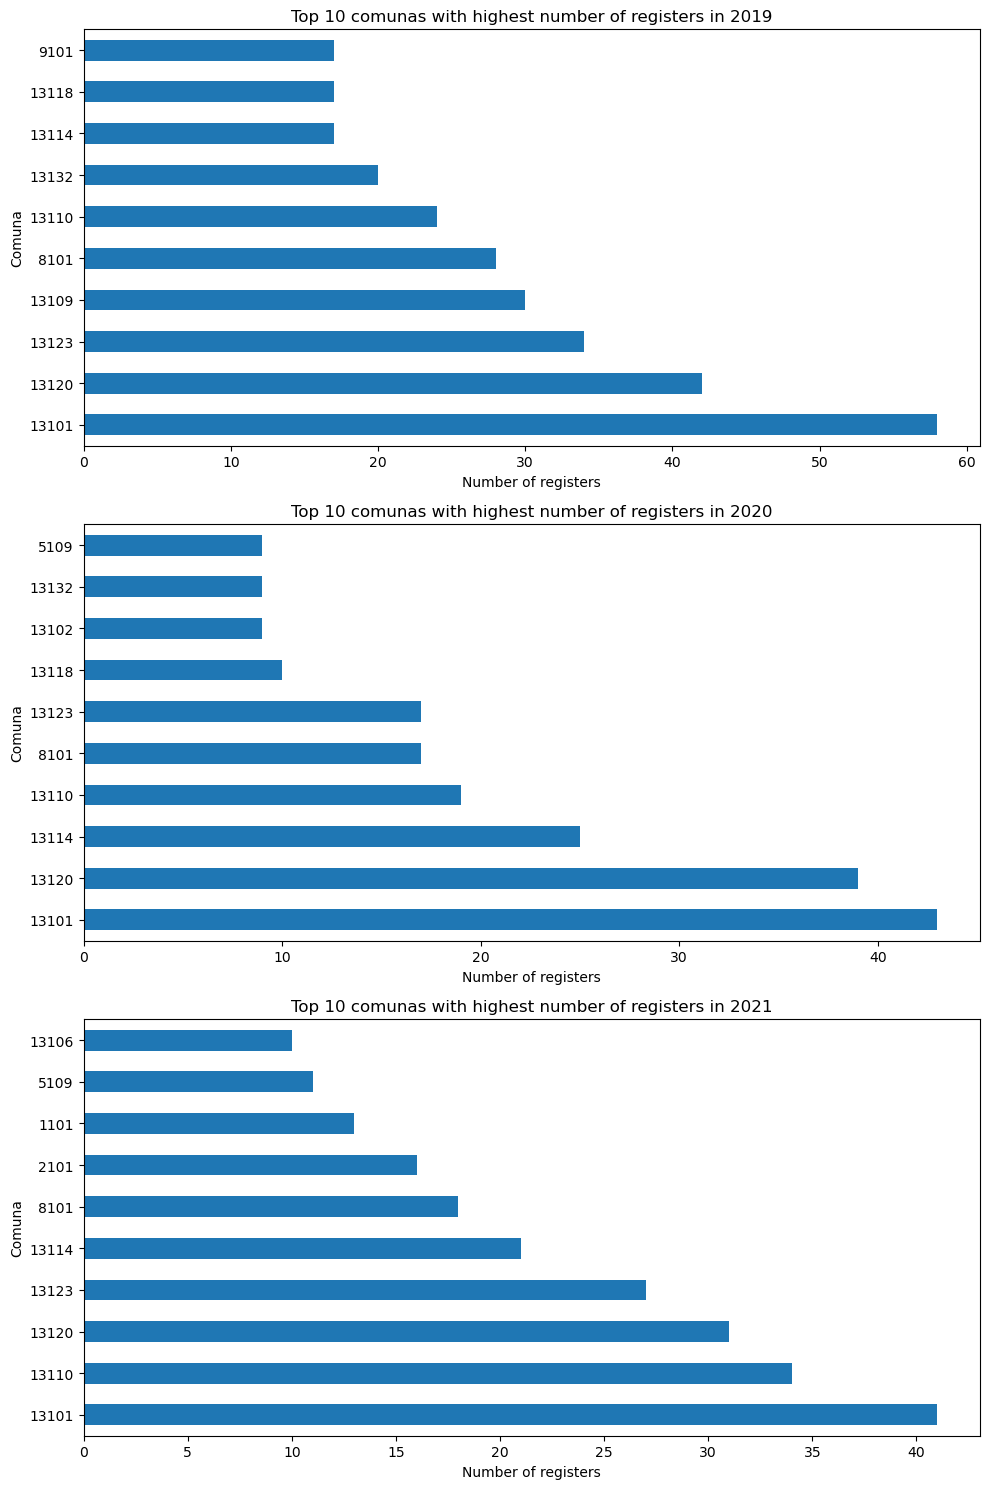

In [34]:
# crear un nuevo dataframe que contenga solo los registros con num_pisos mayores a 5
df_pisos_mayores_5_2019 = df_2019[df_2019['num_pisos'] > 5]
df_pisos_mayores_5_2020 = df_2020[df_2020['num_pisos'] > 5]
df_pisos_mayores_5_2021 = df_2021[df_2021['num_pisos'] > 5]

# agrupar los registros por comuna y contar la cantidad de registros por comuna
comunas_counts_2019 = df_pisos_mayores_5_2019.groupby('Cod_comuna')['Region'].count()
comunas_counts_2020 = df_pisos_mayores_5_2020.groupby('Cod_comuna')['Region'].count()
comunas_counts_2021 = df_pisos_mayores_5_2021.groupby('Cod_comuna')['Region'].count()

# ordenar las comunas por la cantidad de registros en orden descendente
comunas_counts_2019 = comunas_counts_2019.sort_values(ascending=False)
comunas_counts_2020 = comunas_counts_2020.sort_values(ascending=False)
comunas_counts_2021 = comunas_counts_2021.sort_values(ascending=False)

# seleccionar las 10 comunas con mayor cantidad de registros
top_10_comunas_2019 = comunas_counts_2019.head(10)
top_10_comunas_2020 = comunas_counts_2020.head(10)
top_10_comunas_2021 = comunas_counts_2021.head(10)

# mostrar las 10 comunas con mayor cantidad de registros
display(top_10_comunas_2019)
display(top_10_comunas_2020)
display(top_10_comunas_2021)

import matplotlib.pyplot as plt

# create a figure
fig, axs = plt.subplots(3, figsize=(10, 15))

# plot the top 10 comunas for each year
top_10_comunas_2019.plot(kind='barh', ax=axs[0])
top_10_comunas_2020.plot(kind='barh', ax=axs[1])
top_10_comunas_2021.plot(kind='barh', ax=axs[2])

# set the title and labels for each subplot
axs[0].set_title('Top 10 comunas with highest number of registers in 2019')
axs[0].set_xlabel('Number of registers')
axs[0].set_ylabel('Comuna')
axs[1].set_title('Top 10 comunas with highest number of registers in 2020')
axs[1].set_xlabel('Number of registers')
axs[1].set_ylabel('Comuna')
axs[2].set_title('Top 10 comunas with highest number of registers in 2021')
axs[2].set_xlabel('Number of registers')
axs[2].set_ylabel('Comuna')

# adjust the layout
plt.tight_layout()

# show the plot
plt.show()



## Pregunta 6: Para cada uno de los tres años ¿Cuáles son las comunas que tienen una mayor cantidad de permisos de edificación de "OBRA NUEVA" para cada región?

## Pregunta 7: ¿Que materialidad de los muros (material1_grupo1) son más comunes según región?